类的基本结构

以我的游戏脚本为例：角色的定义并没有使用类，而是用了字典的方式

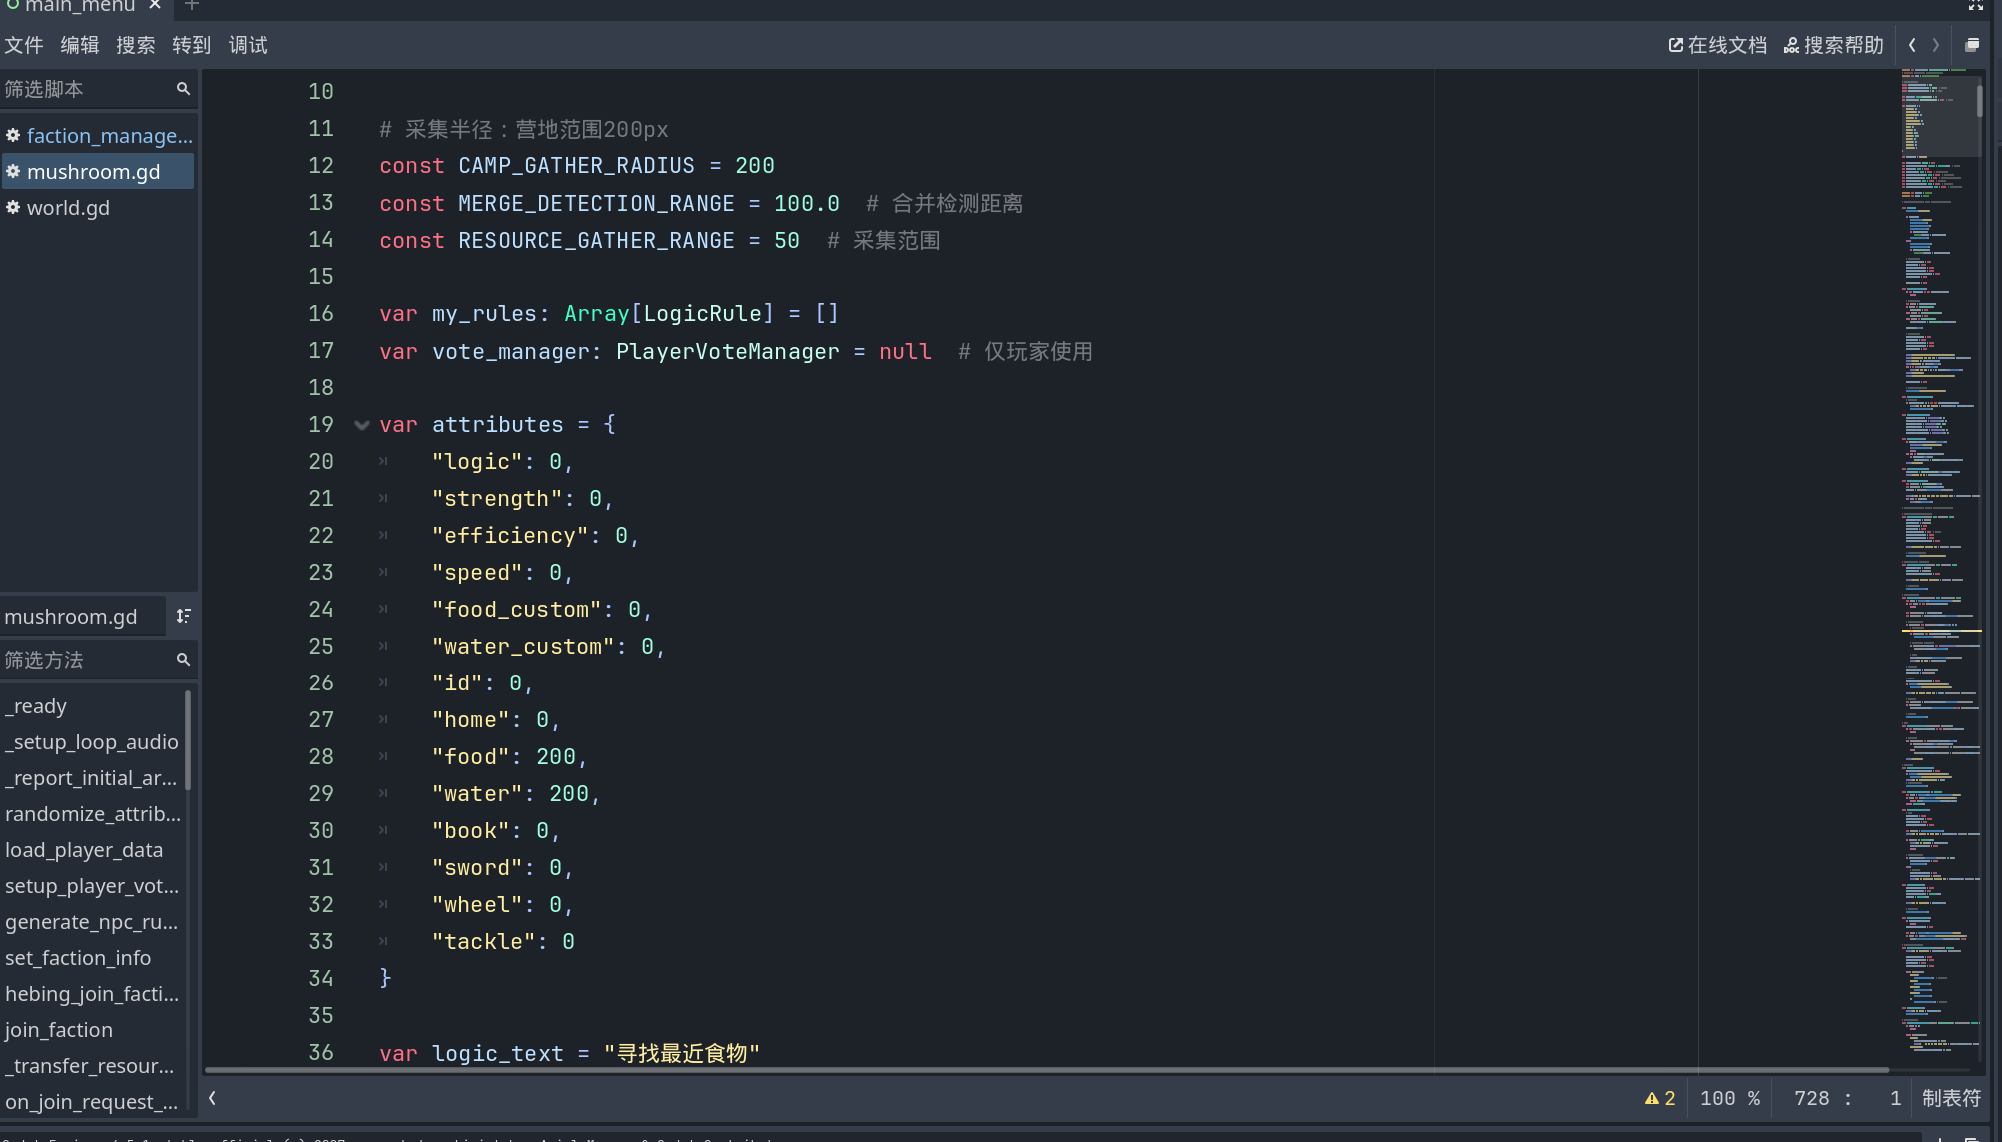

阵营数据的定义使用了类

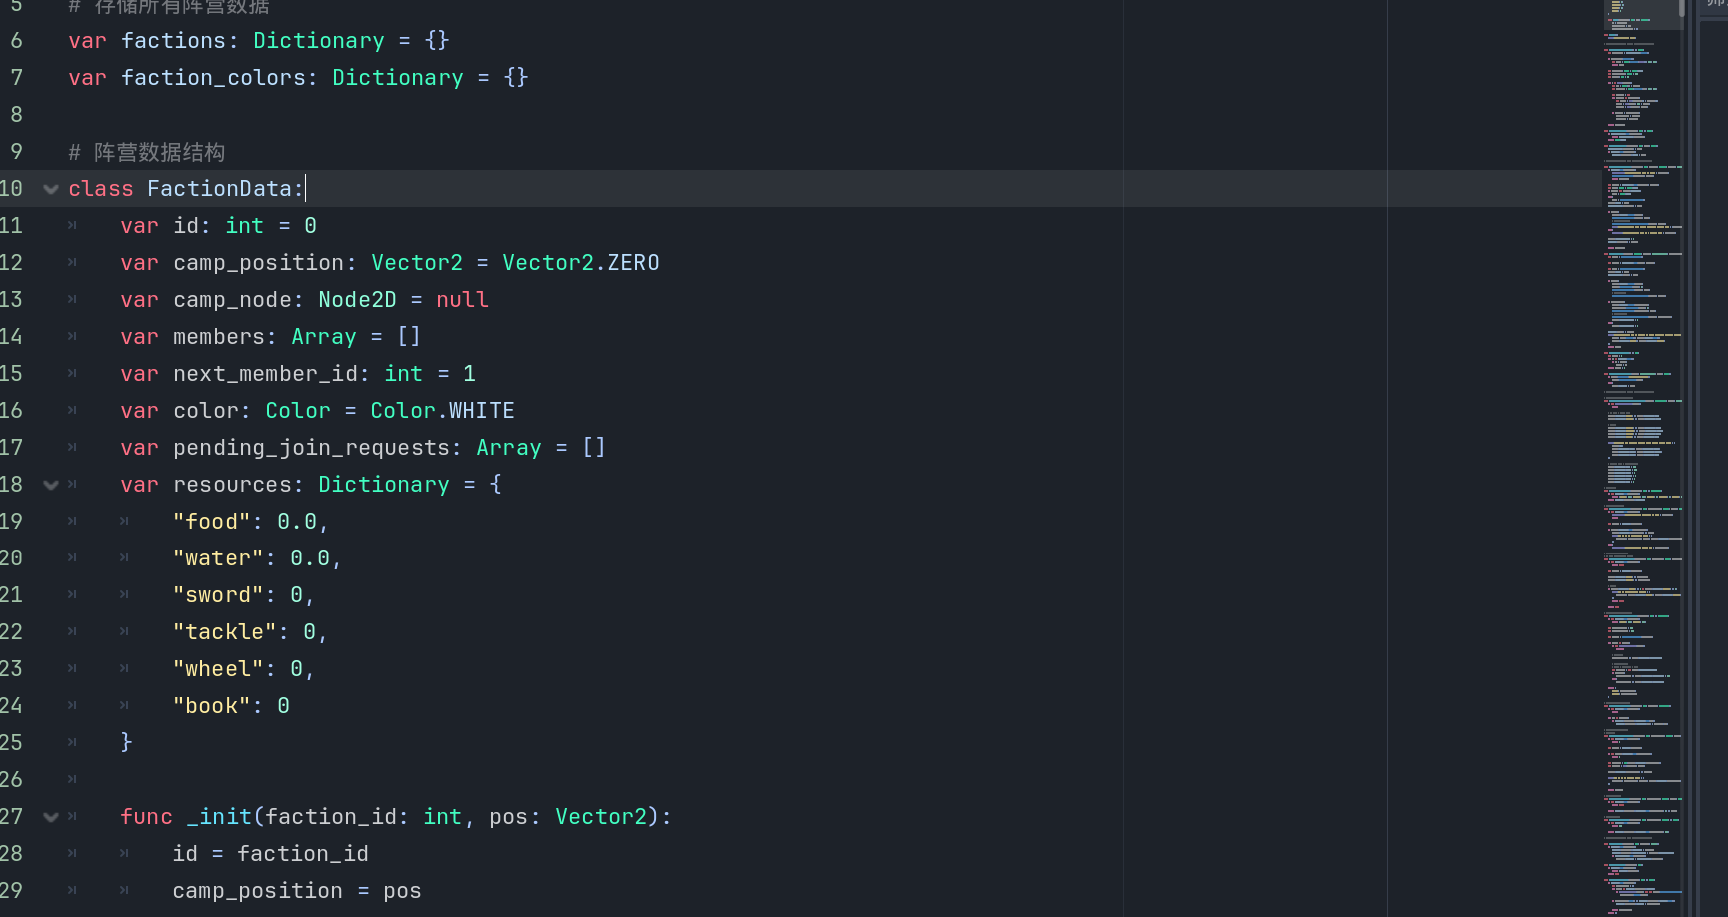

对象之间的交互

In [2]:
class Dog:
    role = "dog" #狗的角色属性是狗
    
    def __init__(self,name,breed,attack_val):#初始化函数，储存了dog实例的name，breed，attack_val，life_val属性
        self.name = name
        self.breed = breed
        self.attack_val = attack_val
        self.life_val = 100
    def bite(self,person): #方法，狗咬人，调用人的生命值-狗的攻击力
        person.life_val -= self.attack_val
        print("狗[%s]咬了人[%s]，人掉血[%s]，剩余血量[%s]"%(self.name,person.name,self.attack_val,person.life_val))

class Person:
    role = "person"
    
    def __init__(self,name,gender,attack_val):
        self.name = name
        self.gender = gender
        self.attack_val = attack_val
        self.life_val = 100
    
    def attack(self,dog):
        dog.life_val -= self.attack_val
        print("人[%s]打了狗[%s]，狗掉血[%s]，剩余血量[%s]"%(self.name,dog.name,self.attack_val,dog.life_val))

d1 = Dog("mjj","二哈",30)
d2 = Dog("马金毛","金毛",30)

p1 = Person("Alex","M",50)


基本的对象交互，人打狗，狗咬人

In [4]:
p1.attack(d1)
d1.bite(p1)

人[Alex]打了狗[mjj]，狗掉血[50]，剩余血量[0]
狗[mjj]咬了人[Alex]，人掉血[30]，剩余血量[70]


类与类之间的关系：
1.依赖关系：类似狗和主人，一类属于另一类，被依赖的一方死了另一方也会死
2.关联关系：可以产生独特交互的联系，就像人狗大战的双方
3.聚合关系：各类组成一个完整的大类，但其中的单独的类也是完整的一类
4.组合关系：各类组成一个完整的大类，但只要大类出问题，小类也会出问题
5.继承关系：（三特性之一）

依赖关系

In [12]:
class Dog:
    role = "dog" #狗的角色属性是狗
    
    def __init__(self,name,age,breed,master):#初始化函数，储存了dog实例的name，breed，attack_val，life_val属性
        self.name = name
        self.breed = breed
        self.age = age
        self.master = master#传入master时，master已经作为person类中的一个实例
        ###依赖关系！！！当person出现问题，狗也会出现问题
        self.sayhi()###在初始化的时候就调用这个方法
    
    def sayhi(self):
        print("hi,i am %s ,a %s dog, my master is %s"%(self.name,self.breed,self.master.name))

class Person:
    role = "person"
    
    def __init__(self,name,gender,age):
        self.name = name
        self.age = age
        self.gender = gender
        
    def walk_dog(self,dog_obj):
        print("主人[%s]带狗[%s]去溜溜"%(self.name,dog_obj.name))

In [13]:
p1 = Person("Alex",25,"M")
d1 = Dog("Mjj",2,"二哈",p1)

hi,i am Mjj ,a 二哈 dog, my master is Alex


关联关系

In [20]:
class Person:
    def __init__(self,name,gender,age):
        self.name = name
        self.age = age
        self.gender = gender
        self.partner = None #预留了parter的位置，但是不是每个人都会传入

#一个类中的一个实例可能与另一个类的实例建立属性联系，且联系可以切断
#双向关联法
p1 = Person("MJJ",24,"M")
p2 = Person("LYY",22,"F")
p1.partner = p2
p2.partner = p1
#这种关联方法绑定和解绑都需要两次手动过程，比较麻烦。下面是优化版方案
print(p1.partner.name)
print(p2.partner.name)

LYY
MJJ


In [44]:
class RelationShip:#通过用一个新的类保存、解除联系，方便统一的确定和消除
    def __init__(self):
        self.couple = []#self是这个类的实例，即一段联系
        
    def make_couple(self,obj1,obj2):#保存确定联系的方法
        self.couple = [obj1,obj2]
        print("[%s]和[%s]确定联系"%(obj1.name,obj2.name))
        
    def get_my_partner(self,obj):#获取联系对象的方法
        for i in self.couple:#在列表中匹配
            if i != obj:#!!!列表一共只有两个成员，找a的对象，不是a的成员就是a的对象
                return i.name
        else:
            print("没有对象")
    
    def break_up(self):#解除联系
        print("[%s]和[%s]解除了联系"%(self.couple[0].name,self.couple[1].name))
        self.couple.clear()#列表清空
        

class Person:
    def __init__(self,name,gender,age,relation):
        self.name = name
        self.age = age
        self.gender = gender
        self.relation = relation

#一个类中的一个实例可能与另一个类的实例建立属性联系，且联系可以切断
#双向关联法
relation_obj = RelationShip()#实例化上面的RelationShip()类
p1 = Person("MJJ",24,"M",relation_obj)
p2 = Person("LYY",22,"F",relation_obj)


relation_obj.make_couple(p1,p2)
print(p1.relation.couple)
p1.relation.get_my_partner(p1)
print(p1.relation.get_my_partner(p1))
p1.relation.break_up()

[MJJ]和[LYY]确定联系
[<__main__.Person object at 0x0000025215C32C70>, <__main__.Person object at 0x000002521615AE50>]
LYY
[MJJ]和[LYY]解除了联系


组合关系

In [17]:
class Dog:
    role = "dog" #狗的角色属性是狗
    
    def __init__(self,name,breed,attack_val):#初始化函数，储存了dog实例的name，breed，attack_val，life_val属性
        self.name = name
        self.breed = breed
        self.attack_val = attack_val
        self.life_val = 100
        
    def bite(self,person): #方法，狗咬人，调用人的生命值-狗的攻击力
        person.life_val -= self.attack_val
        print("狗[%s]咬了人[%s]，人掉血[%s]，剩余血量[%s]"%(self.name,person.name,self.attack_val,person.life_val))

class Person:
    role = "person"
    
    def __init__(self,name,gender):
        self.name = name
        self.gender = gender
        self.weapon = Weapon()#!!!在这里实例化weapon类，weapon只能依赖person类运行
        self.life_val = 100
    
class Weapon:#特殊的类不需要初始化，是一个独立的组件，但不能独立运行
    def dog_stick(self,obj):#打狗棒
        self.name = "打狗棒"
        self.attack_val = 40
        obj.life_val -= self.attack_val
        self.print_log(obj)#这个是交互的日志
    #。。。
    #可以在后续添加很多的武器
    def print_log(self,obj):
        print("[%s]被[%s]攻击了，掉血[%s]，剩余血量[%s]"%(obj.name,self.name,self.attack_val,obj.life_val))
    

In [18]:
p1 = Person("Alex","M")
d1 = Dog("Mjj","二哈",20)
d1.bite(d1)
p1.weapon.dog_stick(d1)

狗[Mjj]咬了人[Mjj]，人掉血[20]，剩余血量[80]
[Mjj]被[打狗棒]攻击了，掉血[40]，剩余血量[40]


继承(单继承)

In [20]:
class Animal:#定义了一个哺乳动物类，里面包含了哺乳动物的基本特性
    a_type = "哺乳动物"
    
    def __init__(self,name,age,gender):
        self.name = name
        self.age = age
        self.gender = gender
        
    def eat(self):
        print("%s is eating ..."%self.name)

class Person(Animal):#定义了高级哺乳动物类，括号中间继承了哺乳动物类，说明高级哺乳动物类继承了哺乳动物类的特性（这里继承了初始化，和eating函数）
    a_type = "高级哺乳动物"
    #如果不想继承哺乳动物类的初始化：
    #减少属性：def __init__(self,name...)：重新定义初始化，直接减少函数
    #增加属性：def __init__(self,name,age,gender，HOBBY):
                    #Animal.__init__(self,name,age,gender):这部分可以继承，py2写法
                    #super（）.__init__(name,age,gender):super方法，py3写法,,,在单继承里两种写法等价
                    #self.hobby = hobby这部分新增
    def talk(self):#高级哺乳动物类独有的方法，会说话
        print("person %s is talking ..."%self.name)
    
    def eat(self):
        Animal.eat(self)
        print("person %s is eating ..."%self.name)

class Dog(Animal):#定义了狗这个类，狗继承了哺乳动物类的属性和方法，还添加了追赶这个特有方法
    def chase_rabbit(self):
        print("狗在追逐")
    
p = Person("Alex",22,"M")
p.eat()#调用高级哺乳动物动物类的继承自哺乳动物类的eat方法
p.talk()#高级哺乳动物类的特有方法
print(p.a_type)

d = Dog("Mjj",3,"F")
d.eat()#继承自哺乳动物类的eat方法 
print(d.a_type)
d.chase_rabbit()

Alex is eating ...
person Alex is eating ...
person Alex is talking ...
高级哺乳动物
Mjj is eating ...
哺乳动物
狗在追逐


继承（多继承），不是所有语言都支持：py，c++支持，java不支持

In [24]:
class ShenXian():
    def fly(self):
        print("神仙会飞")
    
    def fight(self):
        print("神仙打架")

class Monkey():
    def eat_peach(self):
        print("猴子吃桃")
    
    def fight(self):
        print("猴子打架")

class MonkeyKing(ShenXian,Monkey):#继承了两个类，继承的顺序是从左到右
    def play_goden_stick(self):
        print("玩金箍棒")

m = MonkeyKing()#将猴王类实例化，这个实例将继承上面两个类的方法，和猴王的特有方法
m.play_goden_stick()
m.fly()
m.eat_peach()
m.fight()#返回最左边的类中的fight

玩金箍棒
神仙会飞
猴子吃桃
神仙打架


In [28]:
class BaseShenXian:
    def fight(self):
        print("原神打架")

class ShenXian(BaseShenXian):
    def fly(self):
        print("神仙会飞")
    
    def fight(self):
        print("神仙打架")

class MonkeyBase:
    def fight(self):
        print("猿猴在打架")

class Monkey(MonkeyBase):
    def eat_peach(self):
        print("猴子吃桃")
    
    #def fight(self):
        #print("猴子打架")

class MonkeyKing(Monkey,ShenXian):#继承了两个类，继承的顺序是从左到右
    def play_goden_stick(self):
        print("玩金箍棒")

m = MonkeyKing()#将猴王类实例化，这个实例将继承上面两个类的方法，和猴王的特有方法
m.play_goden_stick()
m.fly()
m.eat_peach()
m.fight()#返回最左边的类中的fight
##继承的顺序从左到右，#深度优先#，所以fight最先返回从自身到左边找到的第一个fight

玩金箍棒
神仙会飞
猴子吃桃
猿猴在大家


在python中，有两种类的写法，不同写法的继承顺序不同,#经典类按深度优先查找，新式类按广度优先查找#这是py2的
class A: 经典类
    pass
class B(object):新式类
    pass
在py3中都使用广度优先算法（C3算法）；在棱形结构会体现广度优先特征，不同父类会汇聚到一个共同祖先；在上面例子的平行结构会从左到右一查到底